In [1]:
import os

import pandas as pd
import numpy as np

import plotly.express as px

from ray.tune import Analysis

In [2]:
sys.path.append(os.path.abspath('../src'))

from utils import ASSETS_DIR, standardise_column_names, correlation_matrix

In [3]:
# results = pd.read_json(os.path.join(ASSETS_DIR, 'results/', 'hpopt-results-sus-50.json'))

In [4]:
analysis = Analysis("/Users/adhaene/ray_results/invoke_run_2021-12-12_09-27-49")

In [8]:
result = analysis.dataframe()
result = standardise_column_names(result)

wanted_features = ['objective', 'config_decay', 'config_distance', 'config_epochs', 'config_hidden_dim', 'config_gamma', 'config_layers', 'config_lr']
result.drop(columns=[f for f in result.columns if f not in wanted_features], inplace=True)

In [9]:
result.sort_values('objective', ascending=False).head(20)

,objective,config_decay,config_distance,config_epochs,config_gamma,config_hidden_dim,config_layers,config_lr
36,0.709821,0.000179,5.0,105.0,0.25,16,10,0.000563
5,0.686197,0.000228,5.0,120.0,0.75,64,5,0.000254
21,0.680226,0.000304,5.0,105.0,0.50,32,5,0.000366
76,0.678149,0.000118,1.0,90.0,0.00,64,5,0.000143
54,0.675904,0.000407,5.0,120.0,0.00,16,5,0.000170
40,0.671224,0.000106,5.0,105.0,0.50,16,5,0.000603
43,0.662114,0.000271,5.0,120.0,0.50,64,5,0.000478
13,0.661325,0.000260,1.0,90.0,0.50,64,2,0.000415
37,0.653571,0.000120,5.0,105.0,0.50,32,10,0.000213
79,0.649100,0.000963,1.0,120.0,0.75,64,2,0.000998


In [10]:
px.parallel_coordinates(result, dimensions=['config_decay', 'config_distance', 'config_epochs', 'config_hidden_dim', 'config_layers', 'config_lr'],
                        color='objective', color_continuous_scale=px.colors.diverging.Tealrose, color_continuous_midpoint=0.8)

In [11]:
melted = pd.melt(result, id_vars='objective', value_vars=['config_decay', 'config_distance', 'config_gamma', 'config_epochs', 'config_hidden_dim', 'config_layers', 'config_lr'])
melted

,objective,variable,value
0,0.519833,config_decay,0.000150
1,0.419571,config_decay,0.000232
2,0.195641,config_decay,0.000633
3,0.537522,config_decay,0.000208
4,0.532888,config_decay,0.000267
...,...,...,...
667,0.473866,config_lr,0.000238
668,0.555203,config_lr,0.000640
669,0.555196,config_lr,0.000747
670,0.515044,config_lr,0.000511


In [15]:
px.scatter(melted, x='value', y='objective', facet_col='variable') \
    .update_layout(height=500) \
    .update_xaxes(matches=None) \ 
    .update_xaxes(type="log", col=1) \
    .update_xaxes(type="log", col=7)

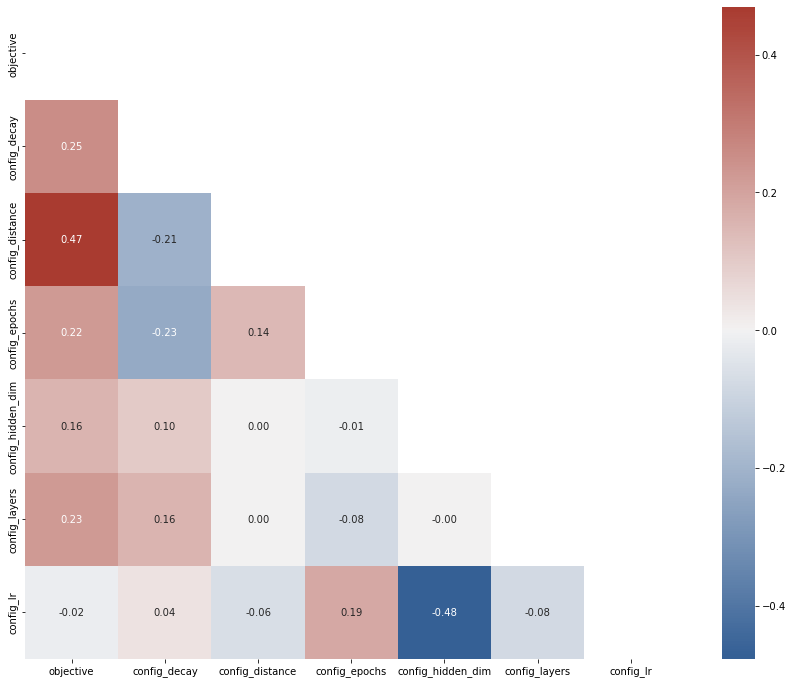

In [11]:
correlation_matrix(result)